# NEW YORK MOBILITY DATASET

# Data Preparation

### Import Python Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()
import os
import matplotlib.pyplot as plt
%matplotlib notebook
!pip install wordcloud
!pip install -U yellowbrick
!pip install lightgbm
from wordcloud import WordCloud
import math
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from scipy.stats import chisquare
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
import array
from pylab import rcParams
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

### Import Data

In [2]:
Trips_NYC = pd.read_csv('Citywide_Mobility_Survey_-_Trip_Diary_2018_cleaned.csv', encoding='utf-8')
Trips_NYC.columns

Index(['Job', 'Trip_ID', 'UniqueID', 'QDAY', 'qday1typical', 'qBOROUGH_HOME',
       'NTACODE_HOME', 'qSURVEYZONE_HOME', 'qTRIPDAYTIME',
       'qDAY1TRIPSTARTCODE',
       ...
       'SURVEYZONE_START Latitude', 'SURVEYZONE_START Longitude',
       'SURVEYZONE_END Latitude', 'SURVEYZONE_END Longitude',
       'Walk to/from Transit', 'Day Grouping', 'Day Grouping & Time',
       'Day&Time', 'Purpose (Grouped)', 'Within Zone?'],
      dtype='object', length=130)

In [3]:
print("Number of rows     :{}".format(Trips_NYC.shape[0]))
print("Number of columns  :{}".format(Trips_NYC.shape[1]))

Number of rows     :7661
Number of columns  :130


# Data Cleaning

In [4]:
print("Number of rows     :{}".format(Trips_NYC.shape[0]))
print("Number of columns  :{}".format(Trips_NYC.shape[1]))

Number of rows     :7661
Number of columns  :130


In [5]:
Trips_NYC.drop_duplicates(inplace = True)
Trips_NYC.drop(['TO TRANSIT: Walk', 'TO TRANSIT: Bicycle', 'TO TRANSIT: Car', 'TO TRANSIT: For-Hire Vehicle', 'TO TRANSIT: Other', "TO TRANSIT: Don't Know", 'TO TRANSIT: Refused', 'FROM TRANSIT: Walk', 'FROM TRANSIT: Bicycle', 'FROM TRANSIT: Car', 'FROM TRANSIT: For-Hire Vehicle', 'FROM TRANSIT: Other', "FROM TRANSIT: Don't Know", 'FROM TRANSIT: Refused', 'TRIP MODE: Walk', 'TRIP MODE: Subway', 'TRIP MODE: Local Bus', 'TRIP MODE:  Select Bus Service', 'TRIP MODE:  Express Bus', 'TRIP MODE:  PATH Train', 'TRIP MODE: Staten Island Ferry', 'TRIP MODE: Other Ferry', 'TRIP MODE: Commuter Rail', 'TRIP MODE: Paratransit/ Access-a-Ride', 'TRIP MODE: Personal Car', 'TRIP MODE: Carshare', 'TRIP MODE: Carpool', 'TRIP MODE: Motorcycle', 'TRIP MODE: Yellow Taxi', 'TRIP MODE: Green Taxi', 'TRIP MODE: Ride-Hail Service', 'TRIP MODE: Shared-Ride Service', 'TRIP MODE: Car Servie', 'TRIP MODE: Community/ Dollar Van', 'TRIP MODE: Personal Bicycle', 'TRIP MODE: Citi Bike', 'TRIP MODE: Electric Bicycle', 'TRIP MODE: Other', "TRIP MODE: Don't Know", 'TRIP MODE: Not Coded', 'TRIP MODE: Refused','DISABILITY: Difficulty Hearing', 'DISABILITY: Difficulty Seeing', 'DISABILITY: Difficulty Walking or Climbing Stairs', "DISABILITY: Limited Mobility and Can't Walk", 'DISABILITY: Difficulty Dressing or Bathing', 'DISABILITY: Physical, Mental or Emotional Condition', 'DISABILITY: None of the Above', "DISABILITY: Don't Know", 'DISABILITY: Refused','WELFARE:  I receive public assistance or welfare payments from the state or local welfare office', 'WELFARE: I am a NYCHA tenant or Section 8 housing voucher recipient', 'WELFARE: None of the above', "WELFARE: Don't know", 'WELFARE: Refused','MEMBERSHIP: Zipcar', 'MEMBERSHIP: Car2go', 'MEMBERSHIP: Enterprise', 'MEMBERSHIP: Reach Now', 'MEMBERSHIP: Other',
 'MEMBERSHIP: None of the above', "MEMBERSHIP: Don't know", 'MEMBERSHIP: Refused'], axis=1, inplace=True)
Trips_NYC.drop(['Job', 'NTACODE_HOME', 'qDAY1TRIPSTARTAM', 'qDAY1TRIPSTARTNOON','qDAY1TRIPSTARTPM','qDAY1TRIP_OUTSIDENYC_START','qNTACODE_START','qDAY1TRIP_OUTSIDENYC_END','qNTACODE_END','qDAY1TRIPLENGTH','qDAY1TRIPPARK','qDAY1TRIPPARKPAY','qDAY1TRIPPARKPAY_AMOUNT','qDAY1TRIPBIKESTORE','qHISPANIC','qEDUCATION','qLICENSE','qCARCHANGE','qSMARTPHONE','qTEMPHIGH','qTEMPLOW','qSUNRISE','qSUNSET','qCITIBIKE','qday1typical','qDAY1TRIPSTARTCODE','qDAY1TRIPEND','qDAY1TRIPENDCODE',], axis=1, inplace=True)
Trips_NYC.columns

Index(['Trip_ID', 'UniqueID', 'QDAY', 'qBOROUGH_HOME', 'qSURVEYZONE_HOME',
       'qTRIPDAYTIME', 'qBOROUGH_START', 'SURVEYZONE_START', 'qBOROUGH_END',
       'SURVEYZONE_END', 'qDAY1TRIPPURPOSE', 'qDAY1TRIPLENGTH_FLT',
       'qDAY1TRIPLENGTH_CAT', 'Number_of_Trips_Taken', 'qGENDER', 'qINCOME',
       'qAGE', 'qAGECODE', 'qRACE', 'qRACECODE', 'qCARACCESS',
       'qPRECIPITATION', 'qDAY1TRIPTRAVELCODE_SP', 'qModeGrouping',
       'qSustainableMode', 'allwt', 'qPurposeRecode',
       'qSURVEYZONE_HOME_Latitude', 'qSURVEYZONE_HOME_Longitude',
       'SURVEYZONE_START Latitude', 'SURVEYZONE_START Longitude',
       'SURVEYZONE_END Latitude', 'SURVEYZONE_END Longitude',
       'Walk to/from Transit', 'Day Grouping', 'Day Grouping & Time',
       'Day&Time', 'Purpose (Grouped)', 'Within Zone?'],
      dtype='object')

In [6]:
Trips_NYC['qINCOME'] = Trips_NYC['qINCOME'].replace({np.nan: "Less than $14,999"})
Trips_NYC['qINCOME'] = Trips_NYC['qINCOME'].replace({"Refused": "Less than $14,999"})
Trips_NYC['qPRECIPITATION'] = Trips_NYC['qPRECIPITATION'].replace({np.nan: 0})
Trips_NYC['qPRECIPITATION'] = Trips_NYC['qPRECIPITATION'].apply(lambda x: "Rain" if x > 0 else "No Rain")
Trips_NYC['qModeGrouping'] = Trips_NYC['qModeGrouping'].replace({"na":'Walk'})
Trips_NYC['qGENDER'] = Trips_NYC['qGENDER'].replace({"Refused":'Female'})
Trips_NYC['qCARACCESS'] = Trips_NYC['qCARACCESS'].replace({"I personally own or lease a car":"own car"})
Trips_NYC['qCARACCESS'] = Trips_NYC['qCARACCESS'].replace({"I do not have access to a car":"NO car"})
Trips_NYC['qCARACCESS'] = Trips_NYC['qCARACCESS'].replace({"I do not personally own or lease a car, but I have access to a car belonging to a member of my household":"NO car"})
Trips_NYC['qCARACCESS'] = Trips_NYC['qCARACCESS'].replace({"NA":"NO car"})
Trips_NYC['qCARACCESS'] = Trips_NYC['qCARACCESS'].replace({"Other":"NO car"})
Trips_NYC['qCARACCESS'] = Trips_NYC['qCARACCESS'].replace({"Refused":"NO car"})
Trips_NYC['qRACECODE'] = Trips_NYC['qRACECODE'].replace({"Don't know, Non-Hispanic":"Other, Non-Hispanic"})
Trips_NYC.dropna(inplace = True)

In [7]:
print("Number of rows     :{}".format(Trips_NYC.shape[0]))
print("Number of columns  :{}".format(Trips_NYC.shape[1]))

Number of rows     :7598
Number of columns  :39


# Data Analysis: Trip Details

## Additional Pre-processing Steps

In [8]:
# removed redundant fields in the dataset
Trips_NYC_Analysis_byTrips = Trips_NYC.drop(labels= ['Trip_ID', 'UniqueID','qBOROUGH_HOME','qSURVEYZONE_HOME','qDAY1TRIPPURPOSE','qDAY1TRIPLENGTH_FLT','qAGE','qRACE','qDAY1TRIPTRAVELCODE_SP','allwt','qSURVEYZONE_HOME_Latitude','qSURVEYZONE_HOME_Longitude','SURVEYZONE_START Latitude','SURVEYZONE_START Longitude','SURVEYZONE_END Latitude','SURVEYZONE_END Longitude'], axis=1)

In [9]:
list(Trips_NYC_Analysis_byTrips)

['QDAY',
 'qTRIPDAYTIME',
 'qBOROUGH_START',
 'SURVEYZONE_START',
 'qBOROUGH_END',
 'SURVEYZONE_END',
 'qDAY1TRIPLENGTH_CAT',
 'Number_of_Trips_Taken',
 'qGENDER',
 'qINCOME',
 'qAGECODE',
 'qRACECODE',
 'qCARACCESS',
 'qPRECIPITATION',
 'qModeGrouping',
 'qSustainableMode',
 'qPurposeRecode',
 'Walk to/from Transit',
 'Day Grouping',
 'Day Grouping & Time',
 'Day&Time',
 'Purpose (Grouped)',
 'Within Zone?']

In [10]:
# For these categorical columns, LabelEnconder was used to convert them to numerical datatype
from sklearn.preprocessing import LabelEncoder
A_TRIPS = Trips_NYC_Analysis_byTrips.columns[(Trips_NYC_Analysis_byTrips.dtypes =='object').values].tolist()

for col in A_TRIPS:
        globals()['LE_{}'.format(col)] = LabelEncoder()
        Trips_NYC_Analysis_byTrips[col] = globals()['LE_{}'.format(col)].fit_transform(Trips_NYC_Analysis_byTrips[col])
Trips_NYC_Analysis_byTrips.head() 

,QDAY,qTRIPDAYTIME,qBOROUGH_START,SURVEYZONE_START,qBOROUGH_END,SURVEYZONE_END,qDAY1TRIPLENGTH_CAT,Number_of_Trips_Taken,qGENDER,qINCOME,...,qPRECIPITATION,qModeGrouping,qSustainableMode,qPurposeRecode,Walk to/from Transit,Day Grouping,Day Grouping & Time,Day&Time,Purpose (Grouped),Within Zone?
0,3,1,1,2,1,2,5,7,1,0,...,0,0,1,2,0,1,4,10,4,1
1,1,0,1,2,1,2,6,9,0,5,...,0,0,1,2,0,0,0,3,4,1
2,6,2,0,0,0,0,12,9,0,0,...,1,0,1,5,0,0,2,20,1,1
3,5,0,5,4,0,0,13,7,0,6,...,0,7,1,2,1,0,0,15,4,0
4,4,2,1,2,0,6,8,6,0,8,...,0,7,1,7,1,0,2,14,4,0


In [11]:
# Listing the category labels of the converted numerical values
for col in A_TRIPS:
    print(col , "  : ", globals()['LE_{}'.format(col)].classes_)

QDAY   :  ['Friday' 'Monday' 'Saturday' 'Sunday' 'Thursday' 'Tuesday' 'Wednesday']
qTRIPDAYTIME   :  ['AM' 'NOON' 'PM']
qBOROUGH_START   :  ['Brooklyn' 'Manhattan' 'Outside of NYC' 'Queens' 'Staten Island'
 'The Bronx']
SURVEYZONE_START   :  ['Inner Brooklyn' 'Inner Queens' 'Manhattan Core' 'Middle Queens'
 'Northern Bronx' 'Northern Manhattan' 'Outer Brooklyn' 'Outer Queens'
 'Outside of NYC' 'Southern Bronx' 'Staten Island']
qBOROUGH_END   :  ['Brooklyn' 'Manhattan' 'Outside of NYC' 'Queens' 'Staten Island'
 'The Bronx']
SURVEYZONE_END   :  ['Inner Brooklyn' 'Inner Queens' 'Manhattan Core' 'Middle Queens'
 'Northern Bronx' 'Northern Manhattan' 'Outer Brooklyn' 'Outer Queens'
 'Outside of NYC' 'Southern Bronx' 'Staten Island']
qDAY1TRIPLENGTH_CAT   :  ['0 to 5' '11 to 15' '16 to 20' '180+' '21 to 25' '26 to 30' '31 to 35'
 '36 to 40' '41 to 45' '46 to 50' '51 to 55' '56 to 60' '6 to 10'
 '61 to 180']
Number_of_Trips_Taken   :  ['1 trip' '10 trips' '11 trips' '12 trips' '15 trips' '19 

### Correlations visualized through Heatmap

<IPython.core.display.Javascript object>


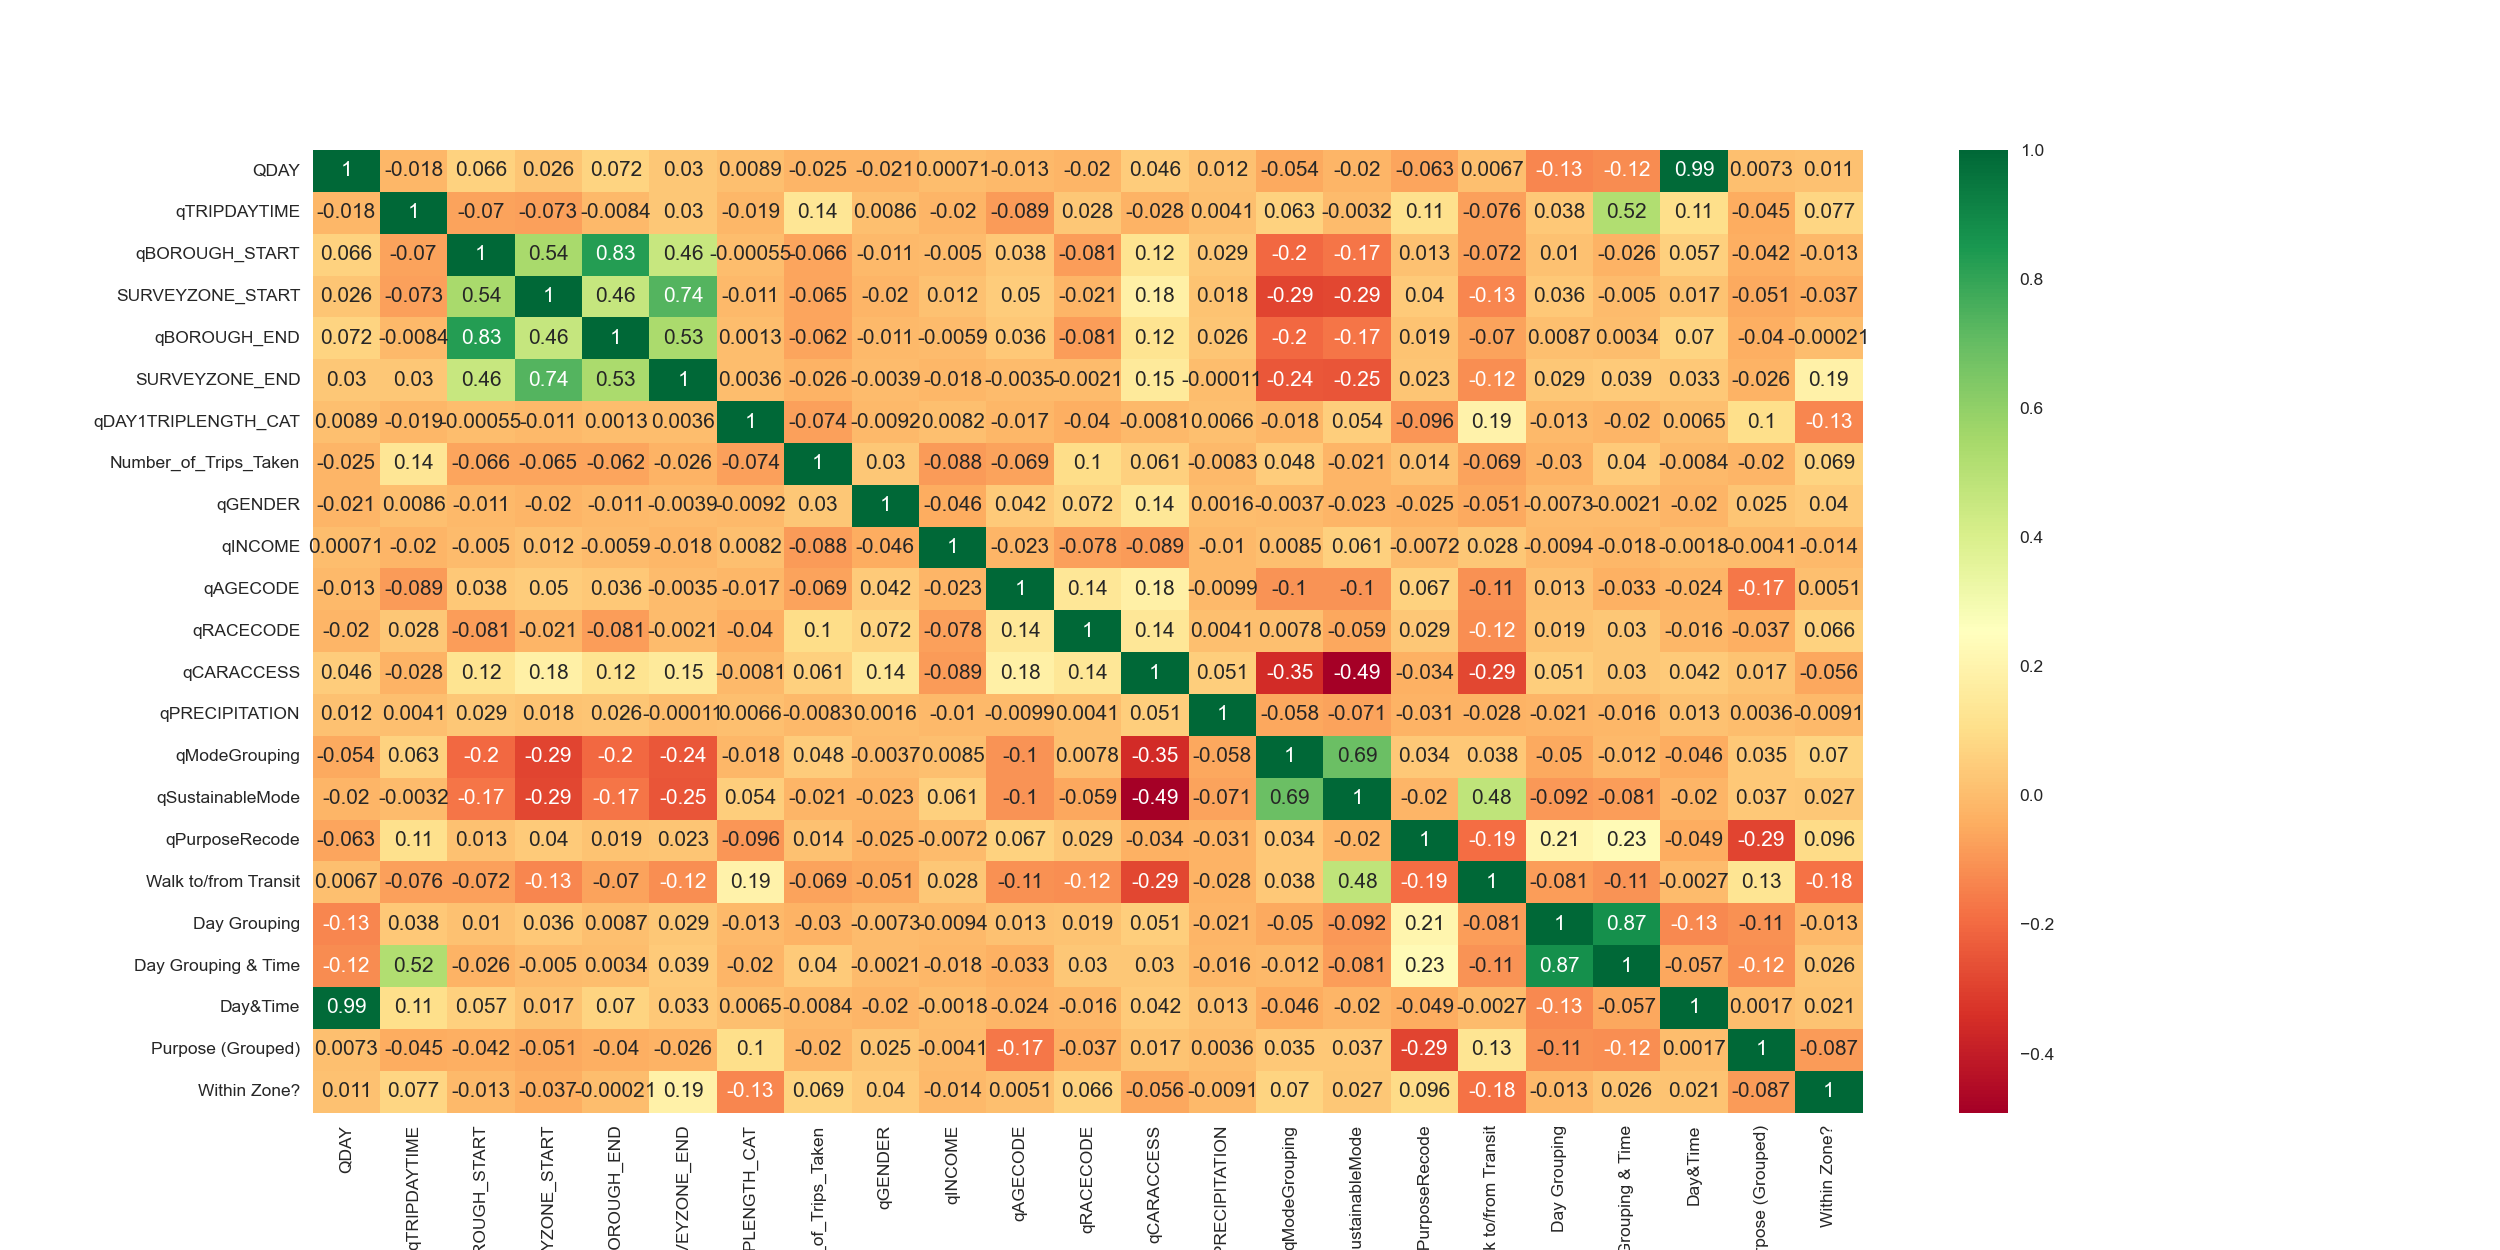

In [12]:
corrmat = Trips_NYC_Analysis_byTrips.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,10))

g=sns.heatmap(Trips_NYC_Analysis_byTrips[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [13]:
cor_target = abs(corrmat["qPurposeRecode"])
relevant_features = cor_target[cor_target>0.2]
relevant_features

qPurposeRecode         1.000000
Day Grouping           0.206217
Day Grouping & Time    0.230475
Purpose (Grouped)      0.287581
Name: qPurposeRecode, dtype: float64

In [14]:
cor_target = abs(corrmat["qModeGrouping"])
relevant_features = cor_target[cor_target>0.2]
relevant_features

qBOROUGH_START      0.201426
SURVEYZONE_START    0.290482
qBOROUGH_END        0.204566
SURVEYZONE_END      0.241869
qCARACCESS          0.353321
qModeGrouping       1.000000
qSustainableMode    0.690297
Name: qModeGrouping, dtype: float64

In [15]:
cor_target = abs(corrmat["qSustainableMode"])
relevant_features = cor_target[cor_target>0.2]
relevant_features

SURVEYZONE_START        0.285181
SURVEYZONE_END          0.252265
qCARACCESS              0.491377
qModeGrouping           0.690297
qSustainableMode        1.000000
Walk to/from Transit    0.481511
Name: qSustainableMode, dtype: float64

In [16]:
# from the Correlation Analysis (through heatmap visualization), qBOROUGH_START and qBOROUGH_END are highly correlated to SURVEYZONE_START and SURVEYZONE_END, respectively. Thus, only one set of this information is retained
# Sustainable Mode of Transportation (target variable) is determined by ModeGrouping transportation classification 
Trips_NYC_Analysis_byTrips = Trips_NYC_Analysis_byTrips.drop(labels= ['qBOROUGH_START','qBOROUGH_END','qModeGrouping'], axis=1)

In [17]:
len(Trips_NYC_Analysis_byTrips) - len(Trips_NYC_Analysis_byTrips.drop_duplicates())

469

In [18]:
Trips_NYC_Analysis_byTrips = Trips_NYC_Analysis_byTrips.drop_duplicates()
Trips_NYC_Analysis_byTrips.reset_index(drop=True ,inplace=True)

## Feature Selection Methods

In [19]:
X = Trips_NYC_Analysis_byTrips.drop(['qSustainableMode'],axis=1)
y = Trips_NYC_Analysis_byTrips['qSustainableMode'].values
feature_name = X.columns.tolist() 

### 1.A. Filter Method - Pearson Correlation

In [20]:
def cor_selector(X, y):
    cor_list = []
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-15:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

In [21]:
cor_support, cor_feature = cor_selector(X, y)
print(str(len(cor_feature)), 'selected features')

15 selected features


### 1.B. Filter Method - Chi2

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=15)
chi_selector.fit(X_norm, y)

SelectKBest(k=15, score_func=<function chi2 at 0x000002797FCA2700>)

In [23]:
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

15 selected features


### 2. Wrapper Method

In [24]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=15, step=1, verbose=1)
rfe_selector.fit(X_norm, y)

Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.


RFE(estimator=LogisticRegression(), n_features_to_select=15, verbose=1)

In [25]:
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

15 selected features


### 3. Embedded Method

In [26]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2"), threshold="median")
embeded_lr_selector.fit(X_norm, y)

SelectFromModel(estimator=LogisticRegression(), threshold='median')

In [27]:
embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

10 selected features


### Results of each Feature Selection Methods

In [28]:
pd.set_option('display.max_rows', None)
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 15
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(15)

,Feature,Pearson,Chi-2,RFE,Logistics,Total
1,qRACECODE,True,True,True,True,4
2,qINCOME,True,True,True,True,4
3,qGENDER,True,True,True,True,4
4,qCARACCESS,True,True,True,True,4
5,Within Zone?,True,True,True,True,4
6,Walk to/from Transit,True,True,True,True,4
7,SURVEYZONE_START,True,True,True,True,4
8,SURVEYZONE_END,True,True,True,True,4
9,Day Grouping,True,True,True,True,4
10,qPurposeRecode,False,True,True,True,3


In [29]:
# Only those 3 out of 4 "True's" (i.e tagged as relevant features) are included further in the modeling and evaluation steps
Trips_NYC_Analysis_byTrips.drop(['QDAY', 'qTRIPDAYTIME','Number_of_Trips_Taken', 'Day&Time', 'Purpose (Grouped)'], axis=1, inplace=True)

In [30]:
list(Trips_NYC_Analysis_byTrips)

['SURVEYZONE_START',
 'SURVEYZONE_END',
 'qDAY1TRIPLENGTH_CAT',
 'qGENDER',
 'qINCOME',
 'qAGECODE',
 'qRACECODE',
 'qCARACCESS',
 'qPRECIPITATION',
 'qSustainableMode',
 'qPurposeRecode',
 'Walk to/from Transit',
 'Day Grouping',
 'Day Grouping & Time',
 'Within Zone?']

In [31]:
# Removed other features not showing relevant correlation to target variable or are redundant
Trips_NYC_Analysis_byTrips.drop(['Within Zone?', 'Walk to/from Transit', 'Day Grouping & Time', 'qPRECIPITATION', 'qAGECODE', 'qDAY1TRIPLENGTH_CAT'], axis=1, inplace=True)

# Modeling and Evaluation

In [32]:
Trips_NYC_Analysis_byTrips.columns

Index(['SURVEYZONE_START', 'SURVEYZONE_END', 'qGENDER', 'qINCOME', 'qRACECODE',
       'qCARACCESS', 'qSustainableMode', 'qPurposeRecode', 'Day Grouping'],
      dtype='object')

In [33]:
X = Trips_NYC_Analysis_byTrips.drop(['qSustainableMode'],axis=1)
y = Trips_NYC_Analysis_byTrips['qSustainableMode'].values

In [34]:
len(y)

7129

In [35]:
Trips_NYC_Analysis_byTrips['qSustainableMode'].value_counts(normalize=True)*100

1    65.647356
0    34.352644
Name: qSustainableMode, dtype: float64

<IPython.core.display.Javascript object>


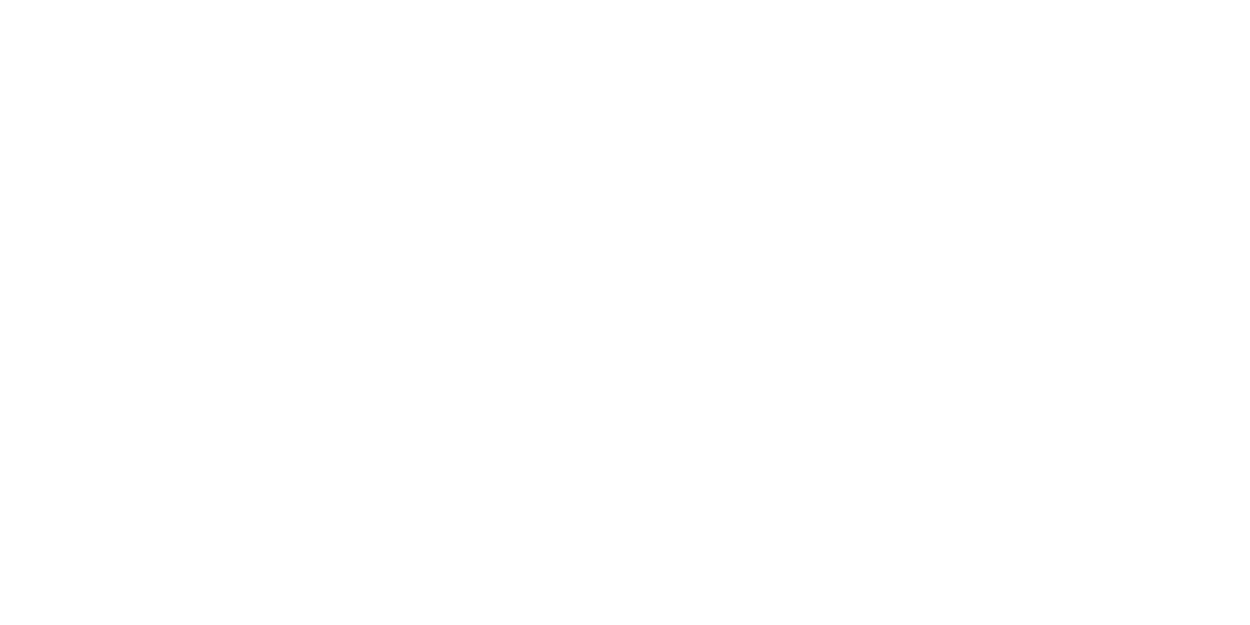

<AxesSubplot:ylabel='qSustainableMode'>

In [36]:
plt.figure(figsize=(10,5))
Trips_NYC_Analysis_byTrips['qSustainableMode'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=13)

In [37]:
# Setting the data into 80-20 train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.2,random_state = 42)

In [38]:
# Before SMOTE
print("Before SMOTE_Train, counts of label '1': {}".format(sum(y_train==1)))
print("Before SMOTE_Train, counts of label '0': {} \n".format(sum(y_train==0)))

print("Before SMOTE_Test, counts of label '1': {}".format(sum(y_test==1)))
print("Before SMOTE_Test, counts of label '0': {} \n".format(sum(y_test==0)))

Before SMOTE_Train, counts of label '1': 3732
Before SMOTE_Train, counts of label '0': 1971 

Before SMOTE_Test, counts of label '1': 948
Before SMOTE_Test, counts of label '0': 478 



### Balance the Dataset : Scale Features and Add Samples to Minority Class using SMOTEENN

In [39]:
# Scaling the data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
x_train_scaled = pd.DataFrame(MMS.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(MMS.transform(x_test), columns=x_test.columns)

In [40]:
# Adding samples to minority class using SMOTE
from imblearn.combine import SMOTEENN
smenn = SMOTEENN()

x_train_sm, y_train_sm = smenn.fit_resample(x_train_scaled, y_train)
x_test_sm, y_test_sm = smenn.fit_resample(x_test_scaled, y_test)

In [41]:
# After SMOTE
print("After SMOTE_Train, counts of label '1': {}".format(sum(y_train_sm==1)))
print("After SMOTE_Train, counts of label '0': {} \n".format(sum(y_train_sm==0)))

print("After SMOTE_Test, counts of label '1': {}".format(sum(y_test_sm==1)))
print("After SMOTE_Test, counts of label '0': {} \n".format(sum(y_test_sm==0)))

After SMOTE_Train, counts of label '1': 2212
After SMOTE_Train, counts of label '0': 2376 

After SMOTE_Test, counts of label '1': 532
After SMOTE_Test, counts of label '0': 582 



# Modeling and Evaluation after balancing

In [42]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    
    
def classif_results(): 
  
  
  conf_mat = confusion_matrix(y_true=y_test_sm, y_pred=pred_y_after_balancing)
  print('Confusion matrix:\n', conf_mat)
  
  labels = ['Class 0', 'Class 1']
  fig = plt.figure()
  ax = fig.add_subplot(111)
  cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
  fig.colorbar(cax)
  ax.set_xticklabels([''] + labels)
  ax.set_yticklabels([''] + labels)
  plt.xlabel('Predicted')
  plt.ylabel('Expected')
  

  print("Accuracy", metrics.accuracy_score(y_test_sm, pred_y_after_balancing))

  from sklearn.metrics import classification_report
  print(classification_report(y_test_sm, pred_y_after_balancing))

  
  auc = roc_auc_score(y_test_sm, pred_y_after_balancing)
  print("AUC Score: ")
  print(auc)

    
  fpr, tpr, thresholds = roc_curve(y_test_sm, pred_y_after_balancing)
  plt.figure(figsize=(10,6))
  plot_roc_curve(fpr, tpr)

## Naive Bayes

In [43]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression 
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

NB = GaussianNB()
NB.fit(x_train_sm, y_train_sm)

# pred_y_after_balancing = classifier_after_balancing.predict(x_test_sm)
# cm = confusion_matrix(y_test_sm,pred_y_after_balancing)
# classif_results()
y_pred = NB.predict(x_test_sm)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test_sm, y_pred)))
print(classification_report(y_test_sm, y_pred))


Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       582
           1       0.88      0.87      0.87       532

    accuracy                           0.88      1114
   macro avg       0.88      0.88      0.88      1114
weighted avg       0.88      0.88      0.88      1114



## Decision Tree

In [44]:
DT = tree.DecisionTreeClassifier()
DT.fit(x_train_sm, y_train_sm)

# pred_y_after_balancing = classifier_after_balancing.predict(x_test_sm)
# cm = confusion_matrix(y_test_sm,pred_y_after_balancing)

# classif_results()
y_pred = DT.predict(x_test_sm)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test_sm, y_pred)))
print(classification_report(y_test_sm, y_pred))


Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       582
           1       0.90      0.92      0.91       532

    accuracy                           0.91      1114
   macro avg       0.91      0.91      0.91      1114
weighted avg       0.91      0.91      0.91      1114



## Logistic Regression

In [45]:
LR = LogisticRegression()
LR.fit(x_train_sm, y_train_sm)

# pred_y_after_balancing = log_model_after_balancing.predict(x_test_sm)
# cm = confusion_matrix(y_test_sm,pred_y_after_balancing)
# classif_results()
y_pred = LR.predict(x_test_sm)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test_sm, y_pred)))
print(classification_report(y_test_sm, y_pred))


Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       582
           1       0.87      0.87      0.87       532

    accuracy                           0.88      1114
   macro avg       0.88      0.88      0.88      1114
weighted avg       0.88      0.88      0.88      1114



## kNN

In [46]:
KNN = KNeighborsClassifier()
KNN.fit(x_train_sm, y_train_sm)

# pred_y_after_balancing = classifier_after_balancing.predict(x_test_sm)
# cm = confusion_matrix(y_test_sm,pred_y_after_balancing)
# classif_results()
y_pred = KNN.predict(x_test_sm)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test_sm, y_pred)))
print(classification_report(y_test_sm, y_pred))


Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       582
           1       0.88      0.91      0.89       532

    accuracy                           0.90      1114
   macro avg       0.90      0.90      0.90      1114
weighted avg       0.90      0.90      0.90      1114



## Support Vector Machines

In [47]:
svm = svm.SVC(kernel = 'rbf', random_state = 0) 

svm.fit(x_train_sm, y_train_sm)

# pred_y_after_balancing = classifier_after_balancing.predict(x_test_sm)
# cm = confusion_matrix(y_test_sm,pred_y_after_balancing)
# # classif_results()
y_pred = svm.predict(x_test_sm)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test_sm, y_pred)))
print(classification_report(y_test_sm, y_pred))


Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       582
           1       0.87      0.90      0.88       532

    accuracy                           0.89      1114
   macro avg       0.89      0.89      0.89      1114
weighted avg       0.89      0.89      0.89      1114



## Artificial Neural Network - Multilayer Perceptron (MLP)

In [48]:
# snn = MLPClassifier(solver='lbfgs', alpha=1e-2, hidden_layer_sizes=(8, 8), random_state=42)
mlp = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')
mlp.fit(x_train_sm, y_train_sm)

# pred_y_after_balancing = classifier_after_balancing.predict(x_test_sm)
# cm = confusion_matrix(y_test_sm,pred_y_after_balancing)

y_pred = mlp.predict(x_test_sm)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test_sm, y_pred)))
print(classification_report(y_test_sm, y_pred))


Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       582
           1       0.87      0.89      0.88       532

    accuracy                           0.89      1114
   macro avg       0.89      0.89      0.89      1114
weighted avg       0.89      0.89      0.89      1114



<IPython.core.display.Javascript object>


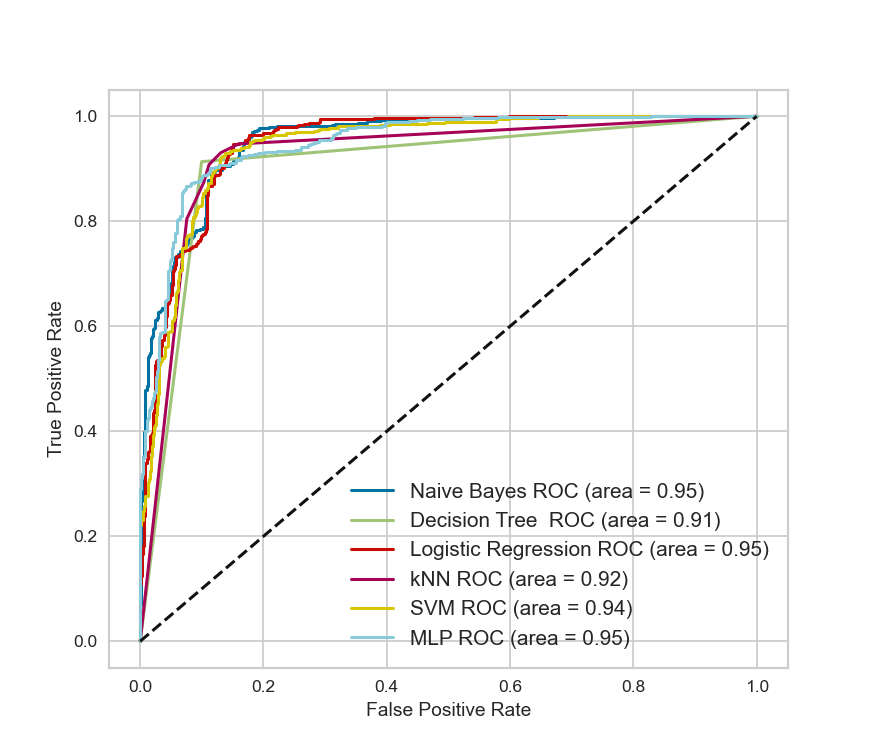

In [49]:
models = [
  
    {
          'label': 'Naive Bayes',
        'model': NB
    },
    {
        'label': 'Decision Tree ',
        'model': DT
    },
    {
        'label': 'Logistic Regression',
        'model': LR
    },
    {
        'label': 'kNN',
        'model': KNN
    },
     {
        'label': 'SVM',
        'model': svm
    },
     {
        'label': 'MLP',
        'model': mlp
    }
]
    
from sklearn.metrics import roc_curve, roc_auc_score, auc
# plt.rcParams['axes.facecolor'] = 'white'


plt.clf()
plt.figure(figsize=(7,6))
for m in models:
    m['model'].probability = True
    probas = m['model'].fit(x_train_sm,y_train_sm).predict_proba(x_test_sm)
    fpr, tpr, thresholds = roc_curve(y_test_sm, probas[:, 1])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0, fontsize='medium')
plt.show()

Predicting if a certain trip is through Sustainable or Non Sustainable Mood of Transportation
qGENDER : 0: 'Female', 1:'Male'

qINCOME : 0: ' 100,000− 149,999', 1: ' 15,000− 24,999', 2: ' 150,000− 199,999', 3: ' 200,000𝑎𝑛𝑑𝑎𝑏𝑜𝑣𝑒′,4:′ 25,000 -  34,999′,5:′ 35,000 -  49,999′,6:′ 50,000 -  74,999′,7:′ 75,000 -  99,999′,8:′𝐿𝑒𝑠𝑠𝑡ℎ𝑎𝑛 14,999'

qRACECODE : 0: 'Asian, Non-Hispanic', 1: 'Black, Non-Hispanic', 2: 'Hispanic', 3: 'Other, Non-Hispanic', 4: 'White, Non-Hispanic

qCARACCESS : 0: 'NO car', 1: 'own car'

SURVEYZONE_START : 0: 'Inner Brooklyn', 1: 'Inner Queens', 2: 'Manhattan Core', 3: 'Middle Queens', 4: 'Northern Bronx', 5: 'Northern Manhattan', 6: 'Outer Brooklyn', 7: 'Outer Queens', 8: 'Outside of NYC', 9: 'Southern Bronx', 10: 'Staten Island'

SURVEYZONE_END : 0: 'Inner Brooklyn', 1: 'Inner Queens', 2: 'Manhattan Core', 3: 'Middle Queens', 4: 'Northern Bronx', 5: 'Northern Manhattan', 6: 'Outer Brooklyn', 7: 'Outer Queens', 8: 'Outside of NYC', 9: 'Southern Bronx', 10: 'Staten Island'

qPurposeRecode : 0: 'Accompanying other traveler', 1: 'Business', 2: 'Commute to/from work', 3: 'Dining', 4: "Medical visit (doctor's office)", 5: 'Other', 6: 'Personal errands', 7: 'School', 8: 'Shopping', 9: 'Social/recreation'

Day Grouping : 0: 'Weekday' 1: 'Weekend'

qSustainableMode : 0: 'No', 1: 'Yes'